# TO RUN
1. Make sure you installed all the dependencies
2. open **'init_notebook.py'** and change the **projectFolder** to the src folder of the repository.
3. In the following cell change the dataDir to the data directory of the InD dataset

In [1]:
dataDir = "G:AV datasets/inD-dataset-v1.0/data/"
dataDir = "E:/Datasets/inD-dataset-v1.0/data/"

In [2]:
exec(open('init_notebook.py').read())

current working dirD:\AV\DataSetExploration\drone-dataset-tools\src


In [3]:
%load_ext autoreload
%autoreload 2

In [5]:
from tools.TrajectoryUtils import TrajectoryUtils
from tools.TrajectoryVisualizer import TrajectoryVisualizer
import matplotlib.pyplot as plt
import numpy as np
visualizer = TrajectoryVisualizer(None)

In [6]:
import pandas as pd
pedDf = pd.read_csv("../data/location-2/2022-11-19-fps-2.5-scene-31-pedestrians.csv")
otherDf = pd.read_csv("../data/location-2/2022-11-19-fps-2.5-scene-31-others.csv")
pedDf.head()

,index,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,xVelocity,yVelocity,xAcceleration,yAcceleration,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY
0,10243,18,334,22208,590,44.33243,-39.89323,339.50256,0.0,0.0,1.09188,-0.22728,0.41405,0.51193,18334,31,6.0,7.196578,3.948259
1,10244,18,334,22218,600,44.79450,-39.93472,344.85402,0.0,0.0,1.30857,-0.07286,0.48330,0.15503,18334,31,6.0,6.986529,3.534605
2,10245,18,334,22228,610,45.37294,-39.95876,348.28785,0.0,0.0,1.49758,-0.08617,0.21311,-0.15383,18334,31,6.0,6.749486,3.006418
3,10246,18,334,22238,620,45.98816,-40.01418,349.78826,0.0,0.0,1.49364,-0.21155,-0.05197,-0.24933,18334,31,6.0,6.469653,2.455728
4,10247,18,334,22248,630,46.56268,-40.12827,349.67809,0.0,0.0,1.44663,-0.30667,-0.03688,-0.11380,18334,31,6.0,6.150449,1.964608


In [7]:
from extractors.LocationData import LocationData
scene10 = LocationData.load("../data/location-2", "2022-11-19-fps-2.5-scene-21.dll")

2022-11-22 13:44:42.614 | INFO     | extractors.LocationData:load:449 - reading from ../data/location-2\2022-11-19-fps-2.5-scene-21.dll


2022-11-22 17:26:47.291 | INFO     | tools.TrajectoryVisualizer:initPlot:33 - Loading background image from E:/Datasets/inD-dataset-v1.0/data/18_background.png


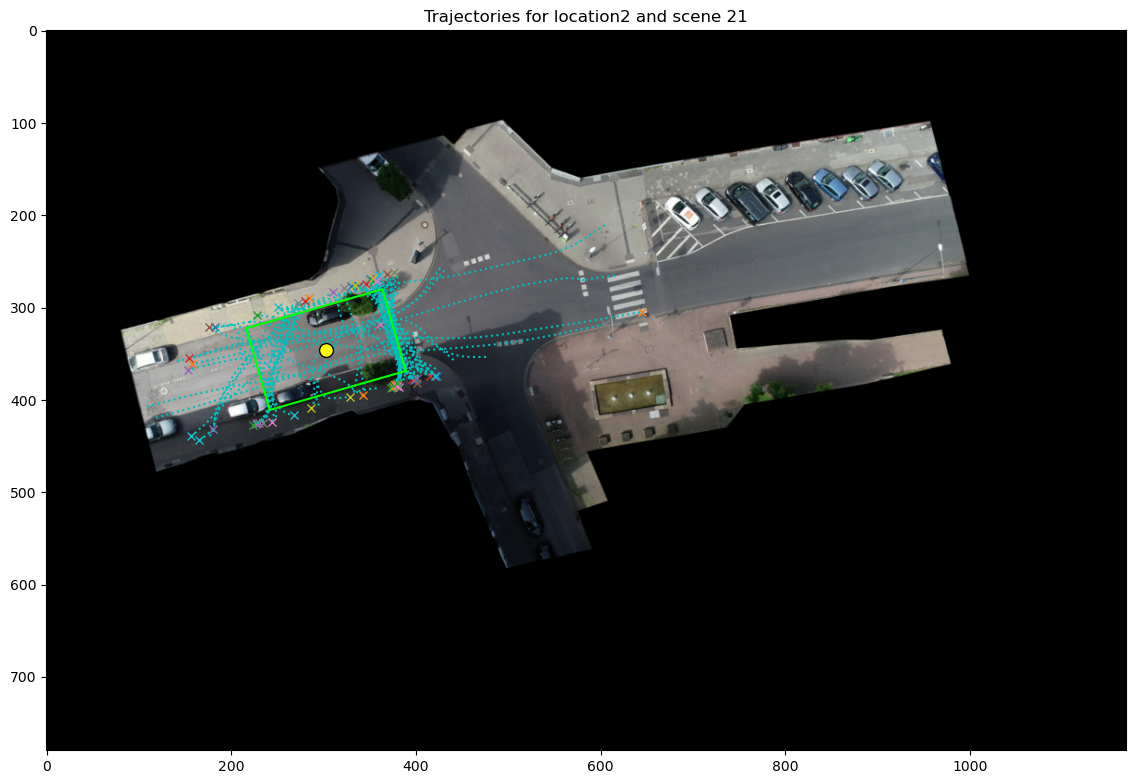

In [85]:
# visualizer.showLocationSceneData(scene10, onlyClipped=True, showOthers=True)
visualizer.showLocationSceneData(scene10, onlyClipped=True)

In [8]:
pedDf.describe()

,index,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,xVelocity,yVelocity,xAcceleration,yAcceleration,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.0,589.0,589.000000,589.000000,589.000000,589.000000,589.000000,589.0,589.0,589.000000,589.000000
mean,64590.563667,22.726655,153.984720,8231.398981,446.519525,47.129536,-42.256447,186.083229,0.0,0.0,0.124719,0.110567,0.000391,0.012322,22880.640068,31.0,6.0,3.963909,2.228245
std,37205.884038,2.845510,122.248178,7283.061793,315.117851,8.411600,4.693036,113.278396,0.0,0.0,1.071713,0.671698,0.220005,0.220858,2863.696658,0.0,0.0,7.073284,6.538215
min,10243.000000,18.000000,16.000000,0.000000,0.000000,10.943360,-52.515910,0.620800,0.0,0.0,-1.863760,-1.552930,-1.068600,-0.845820,18334.000000,31.0,6.0,-6.498478,-4.414461
25%,41027.000000,21.000000,19.000000,1320.000000,170.000000,46.451410,-45.604490,84.677450,0.0,0.0,-0.946160,-0.313240,-0.088490,-0.113800,21328.000000,31.0,6.0,-0.373659,-1.821319
50%,55357.000000,22.000000,129.000000,5810.000000,400.000000,49.414390,-42.669550,164.813780,0.0,0.0,0.223810,0.141240,0.004970,0.003490,22101.000000,31.0,6.0,2.735580,0.868254
75%,78101.000000,24.000000,232.000000,11344.000000,700.000000,51.785410,-40.115790,324.890330,0.0,0.0,1.122030,0.655740,0.098560,0.137290,24171.000000,31.0,6.0,5.200494,3.346067
max,150479.000000,29.000000,431.000000,22466.000000,1210.000000,56.772840,-30.055860,359.985320,0.0,0.0,2.177240,1.451590,0.954000,0.929990,29431.000000,31.0,6.0,27.182317,31.916845


In [39]:
pedDf["uniqueTrackId"].unique()

array([18334, 19019, 19093, 19232, 19302, 21112, 21328, 21359, 22016,
       22101, 23077, 23205, 23391, 24128, 24129, 24171, 24241, 25032,
       26169, 29173, 29174, 29209, 29431], dtype=int64)

In [73]:
import seaborn as sns
from tools.TrajectoryUtils import TrajectoryUtils

In [18]:
otherDf.head(1).iloc[0]["sceneY"]

-1.3620239602302675

In [88]:
aPed = pedDf[pedDf["uniqueTrackId"]==19019]
aPed.head()

,index,recordingId,trackId,frame,trackLifetime,xCenter,yCenter,heading,width,length,xVelocity,yVelocity,xAcceleration,yAcceleration,uniqueTrackId,sceneId,roadWidth,sceneX,sceneY,sceneYSpeed
19,16713,19,19,1100,300,46.75921,-45.87972,76.73985,0.0,0.0,0.32186,1.18220,0.34374,-0.15247,19019,31,6.0,0.736984,3.917091,0.777045
20,16714,19,19,1110,310,46.91490,-45.43185,71.58448,0.0,0.0,0.45169,1.10932,0.25655,-0.10779,19019,31,6.0,1.095061,3.606273,0.777045
21,16715,19,19,1120,320,47.11702,-44.99488,66.81245,0.0,0.0,0.53256,1.08815,0.13193,-0.08242,19019,31,6.0,1.425781,3.256389,0.874711
22,16716,19,19,1130,330,47.33823,-44.56039,62.56725,0.0,0.0,0.55940,1.04937,0.04193,-0.14606,19019,31,6.0,1.747113,2.889699,0.916725
23,16717,19,19,1140,340,47.56173,-44.15812,58.86729,0.0,0.0,0.56240,0.97863,0.02498,-0.17765,19019,31,6.0,2.037677,2.532843,0.892140


In [78]:
def getVelocitySeries(aPedDf: pd.DataFrame, onCol, fps):
    seriesVelo = aPedDf[onCol].rolling(window=2).apply(lambda values: (values.iloc[0]-values.iloc[1]) / (1/fps))
    seriesVelo.iloc[0] = seriesVelo.iloc[1]
    return seriesVelo

getVelocitySeries(aPed, "sceneY", 2.5)
    

19    0.777045
20    0.777045
21    0.874711
22    0.916725
23    0.892140
24    0.872254
25    0.862791
26    0.883648
27    0.870279
28    0.773856
29    0.792775
30    0.855652
31    0.779710
32    0.749929
33    0.738905
34    0.701422
35    0.735196
36    0.761429
37    0.876007
38    0.862411
39    0.682633
40    0.528419
41    0.372314
42    0.214372
43    0.097596
44    0.012787
45   -0.023541
46    0.004952
47    0.097062
48    0.152678
49    0.101990
50   -0.018725
51   -0.078758
52    0.030806
53    0.217239
54    0.464636
55    0.708126
56    0.837595
Name: sceneY, dtype: float64

In [80]:
TrajectoryUtils.getVelocitySeriesForOne(aPed, "sceneY", 2.5)

19    0.777045
20    0.777045
21    0.874711
22    0.916725
23    0.892140
24    0.872254
25    0.862791
26    0.883648
27    0.870279
28    0.773856
29    0.792775
30    0.855652
31    0.779710
32    0.749929
33    0.738905
34    0.701422
35    0.735196
36    0.761429
37    0.876007
38    0.862411
39    0.682633
40    0.528419
41    0.372314
42    0.214372
43    0.097596
44    0.012787
45   -0.023541
46    0.004952
47    0.097062
48    0.152678
49    0.101990
50   -0.018725
51   -0.078758
52    0.030806
53    0.217239
54    0.464636
55    0.708126
56    0.837595
Name: sceneY, dtype: float64

In [81]:
TrajectoryUtils.getTrack_VH_Directions(aPed, "sceneX", "sceneY")

(<TrackDirection.SOUTH: 'SOUTH'>, <TrackDirection.EAST: 'EAST'>)

In [82]:

for pedId in pedDf["uniqueTrackId"].unique():
    aPed = pedDf[pedDf["uniqueTrackId"]==pedId] 
    print(TrajectoryUtils.getTrack_VH_Directions(aPed, "sceneX", "sceneY"))

(<TrackDirection.SOUTH: 'SOUTH'>, <TrackDirection.WEST: 'WEST'>)
(<TrackDirection.SOUTH: 'SOUTH'>, <TrackDirection.EAST: 'EAST'>)
(<TrackDirection.SOUTH: 'SOUTH'>, <TrackDirection.EAST: 'EAST'>)
(<TrackDirection.NORTH: 'NORTH'>, <TrackDirection.WEST: 'WEST'>)
(<TrackDirection.SOUTH: 'SOUTH'>, <TrackDirection.EAST: 'EAST'>)
(<TrackDirection.SOUTH: 'SOUTH'>, <TrackDirection.WEST: 'WEST'>)
(<TrackDirection.NORTH: 'NORTH'>, <TrackDirection.EAST: 'EAST'>)
(<TrackDirection.SOUTH: 'SOUTH'>, <TrackDirection.WEST: 'WEST'>)
(<TrackDirection.NORTH: 'NORTH'>, <TrackDirection.EAST: 'EAST'>)
(<TrackDirection.SOUTH: 'SOUTH'>, <TrackDirection.WEST: 'WEST'>)
(<TrackDirection.NORTH: 'NORTH'>, <TrackDirection.WEST: 'WEST'>)
(<TrackDirection.SOUTH: 'SOUTH'>, <TrackDirection.EAST: 'EAST'>)
(<TrackDirection.NORTH: 'NORTH'>, <TrackDirection.WEST: 'WEST'>)
(<TrackDirection.SOUTH: 'SOUTH'>, <TrackDirection.WEST: 'WEST'>)
(<TrackDirection.SOUTH: 'SOUTH'>, <TrackDirection.WEST: 'WEST'>)
(<TrackDirection.SOUTH: '